In [1]:
NAME = "Benjamin Gottlieb"

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Datascience-for-Economics-Final-Assignment" data-toc-modified-id="Datascience-for-Economics-Final-Assignment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Datascience for Economics Final Assignment</a></span></li><li><span><a href="#Research-question-(0.5-points)" data-toc-modified-id="Research-question-(0.5-points)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research question (0.5 points)</a></span></li><li><span><a href="#Motivation-(0.5-points)" data-toc-modified-id="Motivation-(0.5-points)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Motivation (0.5 points)</a></span></li><li><span><a href="#Method-and-data-(1.0-point)" data-toc-modified-id="Method-and-data-(1.0-point)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Method and data (1.0 point)</a></span></li><li><span><a href="#Preview-of-the-answers-(0.5-points)" data-toc-modified-id="Preview-of-the-answers-(0.5-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preview of the answers (0.5 points)</a></span></li><li><span><a href="#Main-assumptions-(0.5-points)" data-toc-modified-id="Main-assumptions-(0.5-points)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Main assumptions (0.5 points)</a></span></li><li><span><a href="#Python/R-code-(6-points)" data-toc-modified-id="Python/R-code-(6-points)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Python code (6 points)</a></span></li><li><span><a href="#Robustness-analysis-(0.5-points)" data-toc-modified-id="Robustness-analysis-(0.5-points)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Robustness analysis (0.5 points)</a></span></li><li><span><a href="#Discussion-and-conclusion-(0.5-points)" data-toc-modified-id="Discussion-and-conclusion-(0.5-points)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Discussion and conclusion (0.5 points)</a></span></li></ul></div>

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# Datascience for Economics Final Assignment

|Name|SNR|ANR|
|----|---|----|
|Benjamin Gottlieb|2104562|u639970|

# Research question

**In the scope of this project I am investigating how coffee consumption of individuals in the European Union might be driving labour productivity**

# Motivation


Apart from its crucial importance to me Coffee is an essential part of the daily routine of millions of europeans and a stable in the european working environment. Its recreational and social use as well as its performance enhancer function due to its caffeine content, has made it maybe the single most important drink associated with productive capacity (who cares about water). One illustrative example of how strong the contribution of Coffee to Productivity can be is the design of e.g. Java one of the main programming languages used worldwide. <Br>
<img src="https://www.doag.org/fileadmin/243px-Java-Logo-svg.png" alt="Alt Text" width="300">

As a habitual coffee drinker I have always observed on myself how consumption levels increased in time of productive activities rather then in leisure and wondered how this behavior that I also idenfy in my fellow students might scale on a larger scale. As this influence is so universially visible in society it raises the question whether an impact on economic productivity is indeed existing and quantifiable on a macroeconomic scale. Current research has vastly examined the supply side of coffee, e.g. its production and producing countries and its influence on economic performance indicators. The extent of Investigations that adress the demand side and us as consumers of coffee have been fairly limited.  Notable pieces to me mostly focused on the relation between GDP/Income on Consumption as Grigg (2020) or country cases as in Nguyen & Vo (2021). As Grigg has analysed the numbers befor the millenium, I find it intresting to examine the time period since then. Because of the the best availability of data and personal preference I limit my analysis to the framework of countries in the European Union in the course of the years 2000-2019. Even though coffee is often consumed in breaks of the working time, it seems reasonable to assume that the consumption of coffee affects labour productivity positivly. 

# Method and data

To assess the relationship between coffee consumption on labour productivity we use country-level data stemming from 4 diffrent databases:
Eurostat, Worldbank,OECD and the International Coffee Organisation (hereinafter ICO). 
For Eurostat and the Worldbank the data was accessed via the [eurostat](https://pypi.org/project/eurostat/)) and the [wbgapi](https://pypi.org/project/wbgapi/)) API´s. 
ICO data on is connected to the Excel Data on its Website via [link](http://www.ico.org/new_historical.asp?section=Statistics). OECD data was locally loaded in csv format (Despite extensive intents, I could not find a standard easy access for the labour productivity data via API. A solution would be greatly appreciated.)

Our core dataset for the analysis consists of the following Variables: 
* `prod_phw`: nominal labour productivity in GDP at current prices divided by total hours worked (nama_10_lp_ulc - NLPR_HW; for details see [Eurostat](https://ec.europa.eu/eurostat/documents/24987/13735645/LPI-methodological-note.pdf/22cd66e7-1230-d453-273b-b4b09ab7c7d3?t=1638286567962))
* `educ`: educational attainment, the percentage of population that attained tertiary education per country and year (Eurostat)
* `age`: the median age per country per year (Eurostat)
* `inflation_wb`: CPI annual inflation in terms of percentage rate change ([Worldbank](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG))
* `consumption`: coffee consunmption measured in thousand 60-kg bags  (ICO: Disappearance)
* `imports`: coffee imports measured measured in thousand 60-kg bags   (ICO: Trade Statistics Data,  Imports)
* `reexports`: coffee reexports (usually connected to a service like roasting, packaging etc.) measured in thousand 60-kg bags (ICO: Trade Statistics Data, Re-exports)

Additionally, to allow for the calculation of per-capita and uniform currency values data on 
* `exrate`: the mean annual exchange rate EUR/USD (OECD)
* `population`:  population of a country, midyear estimates (Worldbank) <Br>
was collected. All data can be accessed throught the following github repository: * Git hub repository*

### Cleaning & Normalization 
The cleaning process was done with methods from the `pandas` and `numpy` packages. Cleaning for all variables consisted of converting data types (year to integer),filtering for EU countries observations and relevant values for the diffrent variables in correct units and renaming columns in a uniform fashion. For ICO data and Eurostat `wage` data it included striping column and country names for leading whitespaces (ICO data) and trailing characters on the year ("S1" `wage` data). As Eurostat collects Wage data twice a year we took the approach of only taking first half-year value (as indicated by S1).Thereinafter, variable-level data was brought in a long format by melting them on country and year. As this seemed more approachable variables of same sources were firstly merged in one dataframe. The respective long tables were then (left) merged by the same identifier keys.
As many Eurostat observation were only available from 95 onwards and the ICO data for 1990-2000 showed inconsitencies in the measurements on Belgium and Luxemburg and we wanted to connect to the observational period by XYZ decribed above,we selected only observations for the period 2000-2019. The occurence of duplicates in the process was then corrected. Because ICO´s data is collected in USD the amounts were multiplied by the annual exchange rate to bring values in line with Eurostat measurements.
This provided us with a panel dataset containing row-wise country-by-year observations on the above cited variables for the core dataset
Subsequently, we first visualinspect the data.ly Consumption and Productivity levels are plotted over time to get a first impression of the overall trends in our main independant and dependent variable. Then ALtair is used to plot Consumption vs Productivity over time in an interactive scatterplot.  Thereinafter the distributions of all relevant variables are plotted in a histrogram format.  The histograms for the variables *per-capita Consumption* (`cons_pc`), `reexports`, `imports` and `wage`. This makesrevealed right-skewed Distributions  logarithmic transformation necessary to normalize the variables and which is a precondition for later analysis. Plotting log Consumption per capita vs Productivty suggest a linear relationship between the two. A higher log-consumption being correlated with increased productivity levels. To account for missing observations masked arrays were implemented and all variables were standardized. After that we identify the occurence of missing values in each variable via a bar plot and handle them by imputing them with values from the sample distribution of the respective variable with `np.random.choice()`. For this imputation we write filling functions that iterate over the rows and test for the existance of a missing value and fill if missing with a value drawn from the distribution.
 . The handling of outlier is part of the Robustness Analysis.

### Methods
In the main part we first run a Basic OLS-regression ignoring the panel structere of our data thus ignoring time and country fixed effects. `educ`, `ìnflation_wb`, `wage` as well as   coffee `imports` and `reexports` served as controls here. This  mainly serves as a 'bad-practice' baseline to compare the effectiveness of subsequently applied methods.  Then we run another OLS regression with the same covariates,but this time using the `PanelOLS` function from the `linearmodels.panel` package that allows us to incorporate time and country fixed effects in our model.  Building on that we turn to the problem of overfitting and relevant features identification. Thats why we choose to conduct Lasso and Ridge regression that apply penalty terms to additional uptake of covariates in the model (regularization). By applying regularization we are trying to identify relevant features (Lasso) and avoid including covariates with a weak predictive power. This is another step in our process to give reasonable causal interpretation of results we find explaining the relationship between coffee consumption and labour productivity. Both methods are using differing penalty terms for additional parameter included in the model.  Lasso penalizes by the absolute value of new covariates (and a alpha hyperparameter)  and can actually drop weights for unimportant features to zero and is thus useful for selecting relevant variables automatically. Ridge-Regression applies a quadratic penalty term. The choice of the proper penalty term and thus its hyperparameter alpha is crucial for the regressions outcomes and thus needs to be tuned. We do this by finding the optimal parametrization via appliying k-fold cross-validation and running the Regressions over a range of values with respective functions from the `scikit learn` package. Subsequent Lasso and Ridge outputs and barplots are used to visualize the results.
As we conducted the Lasso and Ridge regression in two approaches (the described and one following the approach in the lecture) we get differing results regarding the explanatory importance of the variables. This is reflected in a full and reduced sized model specification for our subsequent Baysian Regression Model. 
The Baysian regression will be used to quantify the effect of consumption and capture the uncertainty in form of a posterior distrubtion around this hypothesized effect by applying Bayes rule. This allows the uptake of prior information about a effect. In our approach we take a low 'uninformative' prior. At last we review the summary results of the model and check the trace plot to evaluate the soundness of the conducted process and outline our results.

The main (reduced) Baysian model is described in the following term:
\begin{equation}
\label{eq:1}
Labour\ productivity = \beta_0 + \beta_1 ln(Coffee\ Consumption\ per\ Capita) + \beta_2\ wage + \beta_3\ age+\beta4\ educ +\beta5\ imports 
\end{equation}

In the reduzed size specification only `educ`, `imports`and `wage` remain the controls. The reduced specification is picked up in  the robustness analysis. 

Due to the large set of observations for many of the european countries over 20 years the data can be attributed high represenativeness for the population of the Euopean Union. Data on Productivity is complete for all entities and years and only 3% of coffee consumption data are missing.  Only the high number of missing data in the minimum wage data also poses a slight concern regarding its representativeness. It is worth mentioning that the data on Coffee stems from ICO a institution within the sector and not a (supra)national instution built for statistical data collection as Eurostat.The IOC data is likely collected different from the sophisticated methods and standards applied by any statistical office. This impedes the overall quality of the IOC data. But overall the role as a internationally recognised organizing should grant the data reasonable credibility. Regarding the measurement of Productivity as pointed out by Eurostat we rely on the assumption that self-employed and employees show the same productivity. Which might be questioned. 

# Main assumptions

Adding to the remarks made above regarding the representiveness of our data and thus our ability to draw conclusions from our investigation regarding the proposed relationship is highly dependent on the assumption that the ICO data collection and sampling processes are unbiased. In the worst case it could be subject to an underlying bias in the selection. One could argue that the ICO might have an incentive to overstate consumption (also import and reexport) numbers as a lobbyist for the industry. This would be detrimental to any findings made on the back of this data. Hence our analysis relies on the assumption of unbiased data collection, obviously for all data sources but especially for the ICO. 
 
 Furthermore, we assume that we can actually infer from this aggregated data on individual consumption and producitivity patterns. It is questionable that aggregated consumption data for countries allowes for inference on unit-level productivity as measured per person per hour worked, the scale on which Labour productivity is measured in our data.This assumption is to be treated with extreme caution as it is likely to be unreasonable and stylized in its claim outside of the limits of this project. This is a key point examined in the discussion.

### Relevant confounders of the Relationship and their hypothesized effect 

In this section I will explain the reasoning behind the incorporation of the diffrent variables in our final dataset and how they are affecting Coffee Consumption and Productivity.

* `educ`: It is reasonably expected that higher levels of education contribute positivly to productivity of a any person. Also for higher education we assume that the It also has been established that coffee has clear health benefits if consumed regulary (in not-excessive quantities). We asssume with higher educational levels people are more health aware and thus consume more coffee. 

* `age`: We expect that for rising age (which is just measured in the labour force from 18-64) the overall productivity usually declines due to aging but more importantly recent technological/digital revolutions  have brought drastic changes to the workfield that are especially hard to adapt to for older workers. At the same time age is also influencing the consumption of coffee as it might be part of a trend culture were young people enjoy their coffee while older rather drank more tee.

* `inflation_wb`: We are expecting to affect productivity in a negative way. In times of higher inflation Consumptive expenditures are reduced. This does affect GDP negativly which in turn functions as the base for our productivity measure.Furthermore it has been observed that people increase the number of hours worked in inflationary periods which affects c.p. productivity negative. (This could be equalized by proportional GDP gains but increasing the work time from 8 to 9 is unlikely to bring equal returns as from 3 to 4). As Consumers reduce non-essential consumption expenditures, coffee consumption is also likely reduced as they could e.g. substitute to cheaper tea for their caffeine.

* `imports`: Coffee imports feed into greater overall Imports and thus affect GDP negatively. This is affecting our *productivity negatively*. We expect that import quantities affect coffee consumption as the way of increased availability. The universal availability of coffees may tempt consumer into *higher consumption*.

* `reexports`:  Reexports of coffee occur for examples after the application of a specific coffee-related service. E.g. Italy is famous for its many brands like Lavazza that import the coffee from around the world but apply brand specific roasting and branding services and then reexport them.  Tt can be an indicator of the importance of the coffee sector to a local economy. This can contribute to GDP and thus we expect *higher labour productivity*. At the same time it might create and fuel a culture of coffee drinking in itself that feeds into *higher consumption*.


The effects of the Covariates on Coffee Consumption will not be quantified here. This is merely to illustrate the counding role of the variable and my reasoning to include them in my data and the model. 

# Preview of the answers

In a nutshell,the Analysis provides evidence for a positive relationship between the variables of interest.The outcomes of the OLS and Baysian regressions deliver consistent evidence for the qualitative positive nature of the relation for differing specifications. Given a one standard deviation increase in the coffee consumption we expect an increase of 0.38 standard deviations in labour productivity according to the Baysian Model (Reduced Form).The trace plots ensure confidence in in the sampling process of the posterior and convergence was achieved.This suggests that coffee consumption is indeed affecting labour productivity positivly as expected. This conclusion is however highly stylised and underlies major limitations raising from the data and research design.

In a nutshell,the Analysis provides evidence for a positive relationship between the variables of interest.The outcomes of the OLS and Baysian regressions deliver consistent evidence for the qualitative positive nature of the relation for differing specifications. Given a one standard deviation increase in the coffee consumption we expect an increase of 0.38 standard deviations in labour productivity according to the Baysian Model (Reduced Form).The trace plots ensure confidence in in the sampling process of the posterior and convergence was achieved.This suggests that coffee consumption is indeed affecting labour productivity positivly as expected. This conclusion is however highly stylised and underlies major limitations raising from the data and research design.

# Python code

## 1.1. Data setup
***

In [2]:
# Import necessary package 
import pandas as pd
import numpy as np
import seaborn as sn
import tensorflow as tf
import pymc3 as pm
from scipy import optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import arviz as az
import tensorflow as tf
import theano
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
import sys
import country_codes
from country_codes import eurostat_dictionary, worldbank_dictionary
from cif import cif
import eurostat
import datetime as dt
#import pandas_datareader.data as web
import requests
from bs4 import BeautifulSoup
import textwrap
import wbgapi as wb

# For model fit
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.cm as mplcm

# for reproducable results
import random

In [3]:
# Set the seed
random.seed(9)

In [4]:
sys.path.append('Report_DS')

Here we define some arrays of relevant strings that are useful for the unification of country notations across data from the diffrent sources and the melting of the years which are also sometimes denoted as integers and sometimes as strings 

In [5]:

iso_countries = ['BEL',"BGR","CZE","DNK","DEU","EST","IRL","GRC","ESP","FRA",
                 "HRV","ITA","CYP","LVA","LTU","LUX","HUN","MLT","NLD","AUT",
                 "POL","PRT","ROU","SVN","SVK","FIN","SWE","GBR","ISL","LIE","NOR","CHE","BIH"]

In [6]:
EU_countries = ['Belgium', 'Bulgaria', 'Czechia', 'Denmark',
'Germany (until 1990 former territory of the FRG)', 'Germany','Estonia',
'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
'Slovenia', 'Slovakia', 'Finland', 'Sweden', 'United Kingdom',
'Iceland', 'Liechtenstein', 'Norway', 'Switzerland',
'Bosnia and Herzegovina']

In [7]:
years = ['2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019']

### 1.1.1. ICO : Coffee Consumption

In [8]:
# Loading/connecting with excel Data of ICO
path_consumption = 'https://www.ico.org/historical/1990%20onwards/Excel/4b%20-%20Disappearance.xlsx'
consumption_data= pd.read_excel(path_consumption, skiprows=3 ) #first three rows were empty 

# Drop the empty row 
consumption_data.drop(0, inplace= True)

In [9]:
# Rename first column
consumption_data = consumption_data.rename(columns={'Calendar years':'country'})
consumption_data.head()
consumption_data = pd.DataFrame(consumption_data)

There are leading whitespaces in country names this needs to be corrected as they hamper matching with EU_countries later. Afterstripping them we check for the success of this operation.

In [10]:
# Check for whitespaces
leading_whitespaces = consumption_data['country'].str.startswith(' ')
print("Before removing leading whitespaces:")
print(leading_whitespaces.sum())
# Striping the whitespaces
consumption_data['country'] = consumption_data['country'].str.strip()
# Check again whether it was successfull , are there any leading whitespaces now?
leading_whitespaces1 = consumption_data['country'].str.startswith(' ')
print("\nAfter removing leading whitespaces:")
print(leading_whitespaces1.sum())

Before removing leading whitespaces:
28

After removing leading whitespaces:
0


In [11]:
# Selection of only EU countries observations
consumption_data = consumption_data[consumption_data['country'].isin(EU_countries)]
consumption_data.head()
# From wide format to long format with melt, years are encoded by IOC as Strings thats why we give it here an array of relevant years to melt on
consumption_data = pd.melt(consumption_data, id_vars= ['country'],
                          value_vars= years,
                          var_name = 'year',
                          value_name= 'consumption')

consumption_data['year']= consumption_data['year'].astype(int)

We do a quick check on our first independant variable. For the other variables the final table will look similar.

In [12]:
consumption_data.head()

,country,year,consumption
0,Austria,2000,874.731279
1,Belgium,2000,1133.360563
2,Bulgaria,2000,275.084816
3,Croatia,2000,327.123995
4,Cyprus,2000,66.796997


### 1.1.2. ICO: Imports & Reexports

The Code for coffee `imports`and `reexports`is analogous to block for Consumption.

In [13]:
path_imports = 'http://www.ico.org/historical/1990%20onwards/Excel/2b%20-%20Imports.xlsx'
imports_df= pd.read_excel(path_imports, skiprows=3)
imports_df.drop(0, inplace= True)
imports_df = imports_df.rename(columns={'Calendar years':'country'})
imports_df = pd.DataFrame(imports_df)
imports_df.columns= [str(col)for col in imports_df.columns]
imports_df['country'] = imports_df['country'].str.strip()

imports_df = imports_df[imports_df['country'].isin(EU_countries)]
imports_df = pd.melt(imports_df, id_vars= ['country'],
                          value_vars= years,
                          var_name = 'year',
                          value_name= 'imports')

imports_df['year']=imports_df['year'].astype(int)

In [14]:
path_reexports = 'http://www.ico.org/historical/1990%20onwards/Excel/2c%20-%20Re-exports.xlsx'
reexports= pd.read_excel(path_reexports, skiprows=3)
reexports.drop(0, inplace= True)
reexports = reexports.rename(columns={'Calendar years':'country'})
reexports = pd.DataFrame(reexports)
reexports.columns= [str(col)for col in reexports.columns]
reexports['country'] = reexports['country'].str.strip()

reexports = reexports[reexports['country'].isin(EU_countries)]
reexports = pd.melt(reexports, id_vars= ['country'],
                          value_vars= years,
                          var_name = 'year',
                          value_name= 'reexports')
reexports['year']=reexports['year'].astype(int)

### 1.1.3. Labour productivity - Eurostat

The variable `nama_10_lp_ulc` is the indicator for nominal labour productivity by Eurostat that we get via the API. Columns are renamed and I drop observations before 2000.

In [15]:
df_prod = eurostat.get_data_df('nama_10_lp_ulc')
df_prod.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_prod['country'] = df_prod['geo'].replace(eurostat_dictionary)
df_prod.drop(np.arange(1975,2000),axis=1,inplace=True)

# Selection of EU countries, productivity per hours worked is the prefered indicator to make cross country comparisons according to Eurostat
df_prod = df_prod[df_prod.country.isin(EU_countries) & (df_prod.na_item == "NLPR_HW")]# NLPR_HW : Nominal labour productivity in hours worked
df_prod.drop(["unit","na_item","geo"],axis=1,inplace=True)


In [16]:
df_prod = pd.melt(df_prod,id_vars=['country'],value_vars=np.arange(2000,2023), var_name='year',value_name='prod_phw')
df_prod.head()

,country,year,prod_phw
0,Austria,2000,118.0
1,Belgium,2000,147.7
2,Bulgaria,2000,33.4
3,Switzerland,2000,129.9
4,Cyprus,2000,82.5


### 1.1.4. AGE

We are using median age data by EUrostat indicated by `MEDAGE`. The variable is listed under demogrpahic indicators `demo_pjanind`.

In [17]:
df_age = eurostat.get_data_df('demo_pjanind')
df_age.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_age['country'] = df_age['geo'].replace(eurostat_dictionary)

df_age = df_age[(df_age.indic_de == "MEDAGEPOP") & df_age.country.isin(EU_countries)]
df_age.drop(["indic_de","geo"],axis = 1,inplace =True)

df_age = pd.melt(df_age, id_vars = ['country'],value_vars= np.arange(2000,2023), var_name= "year" ,value_name= 'age')
df_age['year']=df_age['year'].astype(int)

### 1.1.5. Education
 The variable is listed under demogrpahic indicators `edat_lfse_03`.
 `isced11` is a International Standard for the Classification of Education and`ED5-8` is denoting the percentage that is attending tertiary education.

In [18]:
df_educ = eurostat.get_data_df('edat_lfse_03') 
df_educ.rename({'geo\\time':'geo'},inplace=True,axis=1)
df_educ['country'] = df_educ['geo'].replace(eurostat_dictionary)
#

df_educ = df_educ[(df_educ.isced11 == "ED5-8") & (df_educ.sex == 'T' ) &df_educ.country.isin(EU_countries)]
df_educ.drop(["isced11","geo", "age", "unit", "sex"],axis = 1,inplace =True)
df_educ.head()

df_educ = pd.melt(df_educ, id_vars = ['country'],value_vars= np.arange(2000,2020), var_name= "year" ,value_name= 'educ')
df_educ['year']=df_educ['year'].astype(int)

### 1.1.6. Minimum wages

The wage data by EUrostat is binannual, denoted by S1 or S2. We will be only selecting the values from the first semester for our dataset. Furthermore we will strip all columnnames from the S1 ending.

In [19]:
wage = eurostat.get_data_df('earn_mw_cur')
wage.rename({'geo\\time':'geo'},inplace=True,axis=1)
wage['country'] = wage['geo'].replace(eurostat_dictionary)

In [20]:
s1_columns= wage.columns[wage.columns.str.endswith('S1')]
wage= wage[['country']+ list(s1_columns)]
wage.head()

,country,2023S1,2022S1,2021S1,2020S1,2019S1,2018S1,2017S1,2016S1,2015S1,...,2008S1,2007S1,2006S1,2005S1,2004S1,2003S1,2002S1,2001S1,2000S1,1999S1
0,Albania,297.65,248.43,242.52,213.45,210.66,180.52,162.69,160.26,156.99,...,131.38,113.04,96.26,85.48,74.90,67.06,62.78,52.80,46.98,NaN
1,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Belgium,1955.04,1658.23,1625.72,1593.81,1593.81,1562.59,1531.93,1501.82,1501.82,...,1309.60,1259.00,1234.00,1210.00,1186.31,1163.02,1140.24,1117.88,1095.89,1074.44
3,Bulgaria,398.81,332.34,332.34,311.89,286.33,260.76,235.20,214.75,184.07,...,112.49,92.03,81.79,76.69,61.36,56.28,51.38,40.42,34.26,31.19
4,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for column in wage.columns:
    if column.endswith('S1'):
        new_col = column[:-2] # strips the last two characters 
        wage.rename(columns = {column:new_col}, inplace = True)
        
wage.head()        

wage = pd.melt(wage, id_vars = ['country'],value_vars= years, var_name= "year" ,value_name= 'wage')
wage['year']=wage['year'].astype(int)
wage.head()

,country,year,wage
0,Albania,2000,46.98
1,Austria,2000,NaN
2,Belgium,2000,1095.89
3,Bulgaria,2000,34.26
4,Switzerland,2000,NaN


### 1.1.7. Annual Exchange Rate EUR/USD - [OECD](https://data.oecd.org/conversion/exchange-rates.html)

The data is download as a csv and loaded in locally.

In [22]:
exrate = pd.read_csv('DP_LIVE_13062023113457856.csv')

exrate = exrate[(exrate.LOCATION == 'EU27_2020')] # filter for the EU Exchange rate time series
col_drop = [ 'SUBJECT', 'Flag Codes', 'FREQUENCY','MEASURE', 'INDICATOR', 'LOCATION' ] # specifying all the columns to drop
exrate.drop(col_drop,axis=1,inplace=True)

exrate = exrate.rename(columns= {'Value': 'exrate', 'TIME':'year'})
exrate['year']=exrate['year'].astype(int)

### 1.1.8. Inflation & Population - Worldbank 

#### (a) Inflation

Loads in the Dataframe for CPI data for the provided set of countries in the time 1990-2022. I used Worldbank data here  because it had more observations also concening times before 2000s.

In [23]:
inflation_df = wb.data.DataFrame('FP.CPI.TOTL.ZG',iso_countries,time=range(1990, 2023))

Economy column currently as an index. To melt it later, we need to reset it. Then we are deleting the "YR" prefix of all years. We leave them as strings for now as int gave problems when melting. Then we convert the ISO codes to country names from Worldbank dictionary - analogous to the Lecture (e.g. week 5).

In [24]:
inflation_df.reset_index(inplace=True)

inflation_df.columns= [str(col[2:])for col in inflation_df.columns]
# col[2:] slices the leading YR off, it starts with the 3 character until the end (2:)

inflation_df.rename(columns={'onomy':'geo'}, inplace=True)
inflation_df['country'] = inflation_df['geo'].replace(worldbank_dictionary)

df_inflation = pd.melt(inflation_df,id_vars= ["country"], value_vars= years, var_name='year',value_name= "inflation_wb")
df_inflation.head()

,country,year,inflation_wb
0,Austria,2000,2.344863
1,Belgium,2000,2.544518
2,Bulgaria,2000,10.316262
3,Bosnia and Herzegovina,2000,NaN
4,Switzerland,2000,1.558529


#### (b) Population

In [25]:
pop = wb.data.DataFrame('SP.POP.TOTL',iso_countries,time=range(1995, 2023))

pop.reset_index(inplace=True)

pop.columns= [str(col[2:])for col in pop.columns]
# col[2:] slices the YR off, it starts with the 3 character until the end (2:)

pop['country'] = pop['onomy'].replace(worldbank_dictionary)

pop = pd.melt(pop,id_vars= ["country"], value_vars= years, var_name='year',value_name= "population")


In [26]:
# merge with the inflation data
wb_data= pop.merge(df_inflation,how = 'left', on = ['country','year'])
wb_data['year'] = wb_data['year'].astype(int)

***
### 1.2. Merging the Dataframes

Merging the ICO Data on `country` and `year`.The Left join was choosen just in order to keep the observations from the left/existing - already joined- dataframe.

In [27]:
coffee_data= consumption_data.merge(imports_df,how = 'left',on = ['country','year'])
coffee_data= coffee_data.merge(reexports,how = 'left',on = ['country','year'])
coffee_data['year'] = coffee_data['year'].astype(int)


Merging Eurostat Data

In [28]:
eurostat_data= df_prod.merge(df_age,how = 'left',on = ['country','year'])
eurostat_data= eurostat_data.merge(df_educ,how = 'left',on = ['country','year'])
eurostat_data= eurostat_data.merge(wage,how = 'left',on = ['country','year'])

Merging with Worldbank inflation & OECD Exchange rate data:

In [29]:
eurostat_data= eurostat_data.merge(wb_data,how = 'left',on = ['country','year'])
eurostat_data = eurostat_data.merge(exrate, on='year', how='left')

Merging complete

In [30]:
full_data = eurostat_data.merge(coffee_data,how = 'left',on = ['country','year'])
full_data.head()

,country,year,prod_phw,age,educ,wage,population,inflation_wb,exrate,consumption,imports,reexports
0,Austria,2000,118.0,37.9,NaN,NaN,8011566.0,2.344863,1.082705,874.731279,1257.232892,408.501613
1,Austria,2000,118.0,37.9,NaN,NaN,8011566.0,2.344863,1.082705,874.731279,1257.232892,408.501613
2,Austria,2000,118.0,37.9,NaN,NaN,8011566.0,2.344863,1.082705,874.731279,1257.232892,408.501613
3,Austria,2000,118.0,37.9,NaN,NaN,8011566.0,2.344863,1.082705,874.731279,1257.232892,408.501613
4,Austria,2000,118.0,37.9,NaN,NaN,8011566.0,2.344863,1.082705,874.731279,1257.232892,408.501613


***
### 1.3. Filter for the time period 2000-2019
Because most of the datapoints only ly in the period and to avoid any influence of covid effects we will focus on the period 2000-2019.

In [31]:
full_data = full_data[full_data.year.isin(range(2000,2020))]

data = full_data.drop_duplicates(subset=['country', 'year'])

print(data['country'].value_counts())  # to check whether duplicates deletion was successfull

Austria        20
Belgium        20
Slovenia       20
Sweden         20
Romania        20
Portugal       20
Poland         20
Norway         20
Netherlands    20
Malta          20
Latvia         20
Luxembourg     20
Lithuania      20
Italy          20
Iceland        20
Ireland        20
Hungary        20
Croatia        20
France         20
Finland        20
Spain          20
Greece         20
Estonia        20
Denmark        20
Germany        20
Czechia        20
Cyprus         20
Switzerland    20
Bulgaria       20
Slovakia       20
Name: country, dtype: int64


Finally we are testing for NA values per column to check nothing has gone wrong. Depicted here are Percentage of values that are NAs:

In [32]:
full_data.isnull().mean().mul(100).sort_values(ascending = False)
# https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

wage            34.166667
reexports        3.500000
population       3.333333
inflation_wb     3.333333
consumption      3.333333
imports          3.333333
educ             1.092593
age              0.166667
country          0.000000
year             0.000000
prod_phw         0.000000
exrate           0.000000
dtype: float64

***
## 2. Data Analysis

### 2.1. Defining variables

Coffee Consumption is unitl now measured in the number of 60 kg bags. For better interpretability we convert them to kg measurements. 

In [33]:
data['consumption_kg']=data['consumption']*60

/tmp/ipykernel_11004/1115816579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['consumption_kg']=data['consumption']*60


For comparability with the unit-level productivity we are creating an addition consumption per capita variable. We drop variables that are not relevant anymore from the set.

In [34]:
data['cons_percap']= data['consumption_kg']/data['population']

data.drop(['consumption','exrate', 'population','consumption_kg'],inplace =True, axis=1)

data = data.sort_values('year')
data['year']=pd.Categorical(data['year'])

/tmp/ipykernel_11004/3375192278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cons_percap']= data['consumption_kg']/data['population']
/tmp/ipykernel_11004/3375192278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['consumption','exrate', 'population','consumption_kg'],inplace =True, axis=1)
/opt/conda/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


***
### 2.2. First basic plots

#### (a) Per-capita Consumption & Productivity vs time
To get a first impression on the data we visulize the main dependant and indepent variable over time for the existing set of european countries. How has per capita Coffee consumption and Labour Productivity per hour worked moved over time in the EU?

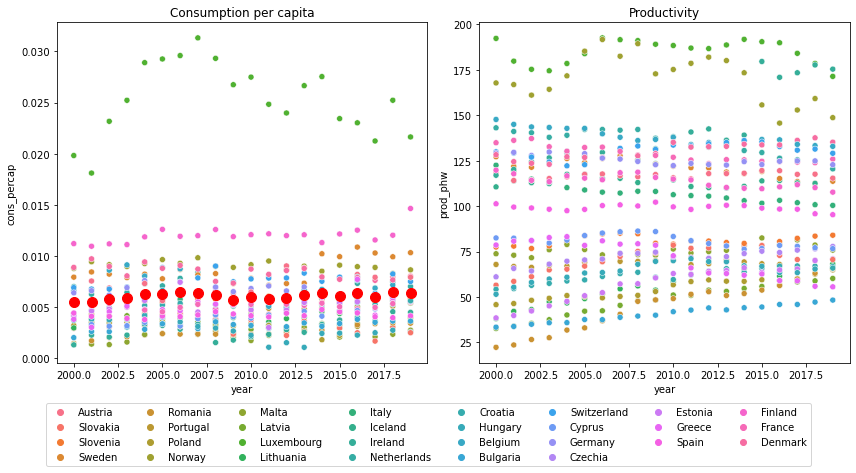

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 
sn.scatterplot(data=data,x = 'year', y = 'cons_percap', hue = 'country', ax =ax1) 
sn.scatterplot(data=data,x = 'year', y = 'prod_phw', hue = 'country', ax =ax2) 
ax1.legend().remove()
ax2.legend().remove()
ax1.set_title('Consumption per capita')
ax2.set_title('Productivity')
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()

# Plot mean values as separate scatter points in ax1
mean_values = data.groupby('year')['cons_percap'].mean()
ax1.scatter(mean_values.index, mean_values.values, s=100, color='red', marker='o', label='Mean')

fig.legend(handles, labels, loc='lower center', ncol= 8, bbox_to_anchor = (0.5,-0.1))
plt.subplots_adjust(bottom=0.15)

plt.show()

Both plots are not too insightful. For left graph it can be derived that consumption values seems to have increased for  european countries (red dots indicate the mean per capita consumption) after 2009.This could be related to the overall economic crisis environment. For prductivity it might me worth mentioning that there seem to be three groups of countries that tend to move accordingly. The lowest group tended to increase its productivity over the period consideree while the middle and high productivity countries tend to have stagnated or slightly decreased in productivity over time.

#### (b) Consumption vs Labour productivity - Interactive Altair Plot

Next we visually inspect the relationship between our variables of intrest, coffee consumption and labour productivity. For this were are constructing an interactive Altair plot that allows to compare them in the european union for diffrent years. The resulting plots are saved subsequently to HTML-files that can be accessed in the repository.

 **Altair plot**

In [36]:
from IPython.display import display
select_year = alt.selection_single(
    name='Select', fields=['year'], init={'year': 2000},
    bind=alt.binding_range(min=2000, max=2019, step=1)
)

figure = alt.Chart(data).mark_point(filled=True,size=50).encode(
    alt.X('cons_percap',title='consumption per cap',scale=alt.Scale(domain=[0,0.04])),
    alt.Y('prod_phw',title='productivity',scale=alt.Scale(domain=[0,200])),
    color='country',
    tooltip=['country']
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).add_selection(select_year).transform_filter(select_year).interactive()


display(figure)

alt.Chart(...)

Analyzing the resulting plot we can the determine that a log Transformation might be useful. We turn to the transformations below. First we inspect the distributions of all Variables.

#### (c) Distribution of Variables

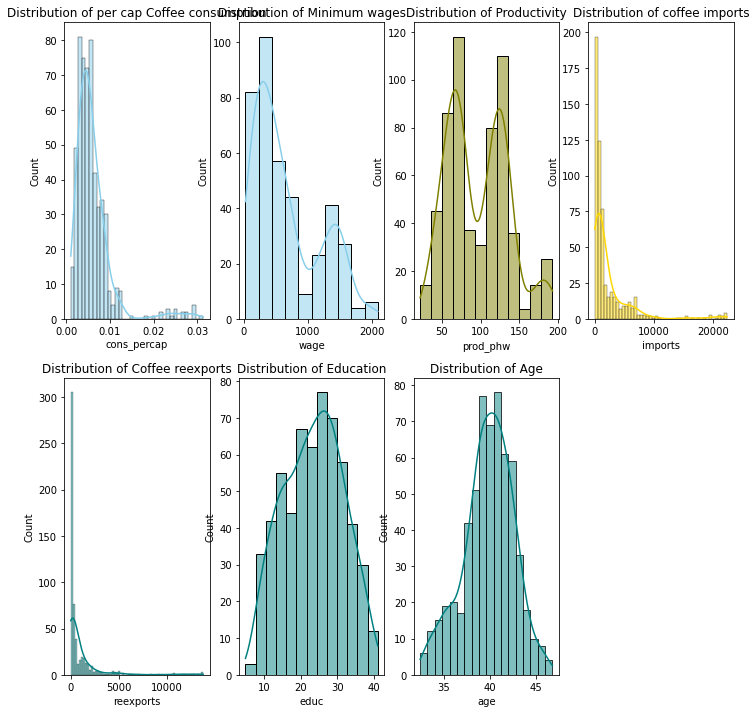

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12))

sn.histplot(data=data, x="cons_percap", kde=True, color="skyblue", ax=axs[0, 0]).set(title='Distribution of per cap Coffee consumption')
sn.histplot(data=data, x="wage", kde=True, color="skyblue", ax=axs[0, 1]).set(title='Distribution of Minimum wages')
sn.histplot(data=data, x="prod_phw", kde=True, color="olive", ax=axs[0, 2]).set(title='Distribution of Productivity')
sn.histplot(data=data, x="imports", kde=True, color="gold", ax=axs[0, 3]).set(title='Distribution of coffee imports')
sn.histplot(data=data, x="reexports", kde=True, color="teal", ax=axs[1, 0]).set(title='Distribution of Coffee reexports')
sn.histplot(data=data, x="educ", kde=True, color="teal", ax=axs[1,1]).set(title='Distribution of Education')
sn.histplot(data=data, x="age", kde=True, color="teal", ax=axs[1,2]).set(title='Distribution of Age')

fig.delaxes(axs[1, 3])

plt.show()

Intrestingly the observations of productivity follow a bimodal distribution.

***
### 2.3. Transformations

The Distributions support our first suspicion about `Coffee consumption`. But also `reexports`, `imports` and `wage` are rightly skewed. We will therefore transform them. 

In [38]:
data['log_prod'] = np.log(data['prod_phw'])
data['log_cons_pc'] = np.log(data['cons_percap'])
data['log_reexports'] = np.log(data['reexports'])
data['log_imports'] = np.log(data['imports'])
data['log_wage'] = np.log(data['wage'])

Lets check the distributions again:

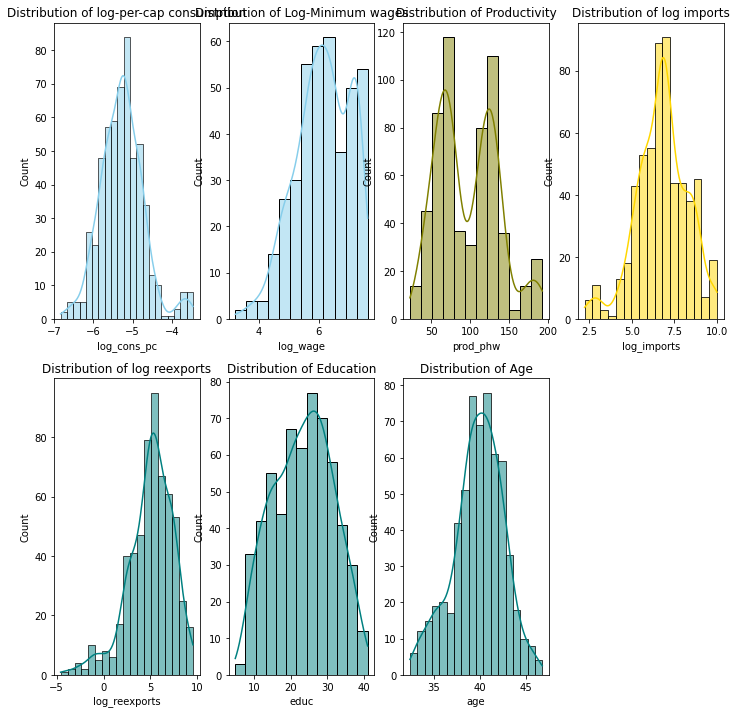

In [39]:
fig, axs = plt.subplots(2, 4, figsize=(12, 12))

sn.histplot(data=data, x="log_cons_pc", kde=True, color="skyblue", ax=axs[0, 0]).set(title='Distribution of log-per-cap consumption')
sn.histplot(data=data, x="log_wage", kde=True, color="skyblue", ax=axs[0, 1]).set(title='Distribution of Log-Minimum wages')
sn.histplot(data=data, x="prod_phw", kde=True, color="olive", ax=axs[0, 2]).set(title='Distribution of Productivity')
sn.histplot(data=data, x="log_imports", kde=True, color="gold", ax=axs[0, 3]).set(title='Distribution of log imports')
sn.histplot(data=data, x="log_reexports", kde=True, color="teal", ax=axs[1, 0]).set(title='Distribution of log reexports')
sn.histplot(data=data, x="educ", kde=True, color="teal", ax=axs[1,1]).set(title='Distribution of Education')
sn.histplot(data=data, x="age", kde=True, color="teal", ax=axs[1,2]).set(title='Distribution of Age')

fig.delaxes(axs[1, 3])

plt.show()

And take another look at now log-Consumption vs Productivity:

In [40]:
from IPython.display import display
figure_logprod = alt.Chart(data).mark_point(filled=True,size=50).encode(
    alt.X('log_cons_pc',title='log consumption',scale=alt.Scale(domain=[-7,-3])),
    alt.Y('prod_phw',title=' productivity',scale=alt.Scale(domain=[0,200])),
    color='country',
    tooltip=['country']
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).add_selection(select_year).transform_filter(select_year).interactive()

display(figure_logprod)

alt.Chart(...)

### 2.4. Standardizing the Data 

We are dealing with the nas in the Dataset by masking them at this point and and standardize them according to the process implemented in the Lecture. The masked arrays are just used when we turn to the Baysian Regression.

In [41]:
# Dealing with them by a masked array

In [42]:
def standardize_ma(x):
    x_ma = np.ma.masked_invalid(x)
    return (x_ma-x_ma.mean())/x_ma.std()    

In [43]:
# Standardize the y variable
log_cons_pc = standardize_ma((data['log_cons_pc']))
# Standardize MA the explanatory variables
age = standardize_ma(data['age'])
inflation_wb = standardize_ma(data['inflation_wb'])
prod_phw = standardize_ma(data['prod_phw'])
imports = standardize_ma(data['imports'])
reexports = standardize_ma(data['reexports'])
educ = standardize_ma(data['educ'])
wage = standardize_ma(data['log_wage'])

In [44]:
log_cons_pc= np.array(log_cons_pc)
age= np.array(age)
inflation_wb= np.array(inflation_wb)
prod_phw= np.array(prod_phw)
imports= np.array(imports)
reexports= np.array(reexports)
educ= np.array(educ)
wage= np.array(wage)

In [45]:
stand_data = pd.DataFrame({'country':data.country,'year':data.year,'age':age,'inflation_wb':inflation_wb,'log_cons_pc': log_cons_pc,'imports': imports,'reexports':reexports, 'y':prod_phw, "educ" : educ, 'wage':wage})
stand_data.head()
#stand_data.dropna(inplace = True)

,country,year,age,inflation_wb,log_cons_pc,imports,reexports,y,educ,wage
0,Austria,2000,-0.711260,-0.063903,0.442886,-0.276454,-0.255446,0.546456,NaN,NaN
783,Slovakia,2000,-2.185974,2.840156,-1.017665,-0.526450,-0.438856,-1.041479,-1.894192,-1.774368
756,Slovenia,2000,-0.748128,1.903982,0.026373,-0.551981,-0.442916,-0.499257,-1.309802,-0.246713
729,Sweden,2000,-0.195110,-0.497139,0.790687,-0.254078,-0.368302,0.784001,0.418501,NaN
702,Romania,2000,-2.001635,12.918237,-2.267952,-0.458089,-0.449370,-1.924527,-1.981229,-3.270260


### 2.5. Identifying & Handling of missing values

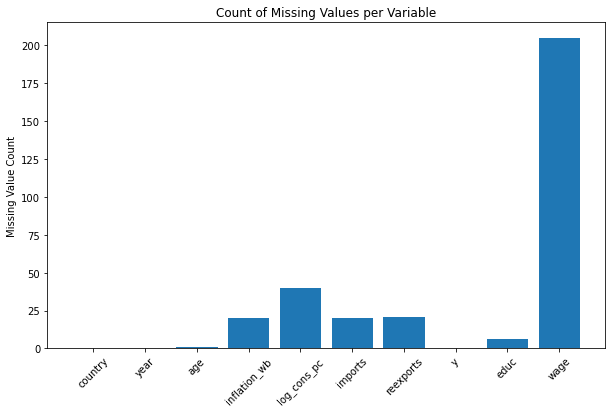

In [46]:
missing_counts = stand_data.isnull().sum()

# Plot the histogram of missing value counts
plt.figure(figsize=(10, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=45)
plt.ylabel('Missing Value Count')
plt.title('Count of Missing Values per Variable')
plt.show()

We will impute the the NAs by drawing a value from the sample distribution.For the Basic OLS as well as Lasso and Ridge regression we will do this "manually" but for the Baysian regression we will use the pymc3 implementation to do in a more sophisticated manner (Therefore we make a copy of the dataset here).

Here we create an additional column of drawn values. We then use a function fill that checks whether there is an NA and if so fills it with the value drawn from the distribution, if not it takes the observed value.

In [47]:
stand_data_bay = stand_data.copy()

In [48]:
stand_data['wage2'] = np.random.choice(stand_data['wage'].dropna(), size=len(stand_data))

In [49]:
stand_data.head()

,country,year,age,inflation_wb,log_cons_pc,imports,reexports,y,educ,wage,wage2
0,Austria,2000,-0.711260,-0.063903,0.442886,-0.276454,-0.255446,0.546456,NaN,NaN,-0.574122
783,Slovakia,2000,-2.185974,2.840156,-1.017665,-0.526450,-0.438856,-1.041479,-1.894192,-1.774368,-1.488288
756,Slovenia,2000,-0.748128,1.903982,0.026373,-0.551981,-0.442916,-0.499257,-1.309802,-0.246713,-0.574122
729,Sweden,2000,-0.195110,-0.497139,0.790687,-0.254078,-0.368302,0.784001,0.418501,NaN,-0.776516
702,Romania,2000,-2.001635,12.918237,-2.267952,-0.458089,-0.449370,-1.924527,-1.981229,-3.270260,-0.183185


In [50]:
import math
def fill_wage(stand_data):
  if math.isnan(stand_data['wage']):
    return stand_data['wage2']
  else:
    return stand_data['wage']


stand_data['wage3'] = stand_data.apply(fill_wage, axis=1)
stand_data.head()

,country,year,age,inflation_wb,log_cons_pc,imports,reexports,y,educ,wage,wage2,wage3
0,Austria,2000,-0.711260,-0.063903,0.442886,-0.276454,-0.255446,0.546456,NaN,NaN,-0.574122,-0.574122
783,Slovakia,2000,-2.185974,2.840156,-1.017665,-0.526450,-0.438856,-1.041479,-1.894192,-1.774368,-1.488288,-1.774368
756,Slovenia,2000,-0.748128,1.903982,0.026373,-0.551981,-0.442916,-0.499257,-1.309802,-0.246713,-0.574122,-0.246713
729,Sweden,2000,-0.195110,-0.497139,0.790687,-0.254078,-0.368302,0.784001,0.418501,NaN,-0.776516,-0.776516
702,Romania,2000,-2.001635,12.918237,-2.267952,-0.458089,-0.449370,-1.924527,-1.981229,-3.270260,-0.183185,-3.270260


In [51]:
stand_data.drop(['wage','wage2'], axis = 1, inplace = True)
stand_data.rename(columns = {'wage3':'wage'}, inplace=True)
stand_data.head()

,country,year,age,inflation_wb,log_cons_pc,imports,reexports,y,educ,wage
0,Austria,2000,-0.711260,-0.063903,0.442886,-0.276454,-0.255446,0.546456,NaN,-0.574122
783,Slovakia,2000,-2.185974,2.840156,-1.017665,-0.526450,-0.438856,-1.041479,-1.894192,-1.774368
756,Slovenia,2000,-0.748128,1.903982,0.026373,-0.551981,-0.442916,-0.499257,-1.309802,-0.246713
729,Sweden,2000,-0.195110,-0.497139,0.790687,-0.254078,-0.368302,0.784001,0.418501,-0.776516
702,Romania,2000,-2.001635,12.918237,-2.267952,-0.458089,-0.449370,-1.924527,-1.981229,-3.270260


Surely there is a shorter way for doing this, but because its so much fun we will write separate according functions  for our varibles containing NaN's.

In [52]:
stand_data['educ2'] = np.random.choice(stand_data['educ'].dropna(), size=len(stand_data))
def fill_educ(stand_data):
  if math.isnan(stand_data['educ']):
    return stand_data['educ2']
  else:
    return stand_data['educ']

stand_data['educ3'] = stand_data.apply(fill_educ, axis=1)
stand_data.drop(['educ','educ2'], axis = 1, inplace = True)
stand_data.rename(columns = {'educ3':'educ'}, inplace=True)

In [53]:
stand_data['inflation_wb2'] = np.random.choice(stand_data['inflation_wb'].dropna(), size=len(stand_data))
def fill_inflation_wb(stand_data):
  if math.isnan(stand_data['inflation_wb']):
    return stand_data['inflation_wb2']
  else:
    return stand_data['inflation_wb']

stand_data['inflation_wb3'] = stand_data.apply(fill_inflation_wb, axis=1)
stand_data.drop(['inflation_wb','inflation_wb2'], axis = 1, inplace = True)
stand_data.rename(columns = {'inflation_wb3':'inflation_wb'}, inplace=True)

In [54]:
stand_data['log_cons_pc2'] = np.random.choice(stand_data['log_cons_pc'].dropna(), size=len(stand_data))
def fill_log_cons_pc(stand_data):
  if math.isnan(stand_data['log_cons_pc']):
    return stand_data['log_cons_pc2']
  else:
    return stand_data['log_cons_pc']

stand_data['log_cons_pc3'] = stand_data.apply(fill_log_cons_pc, axis=1)
stand_data.drop(['log_cons_pc','log_cons_pc2'], axis = 1, inplace = True)
stand_data.rename(columns = {'log_cons_pc3':'log_cons_pc'}, inplace=True)

In [55]:
stand_data['imports2'] = np.random.choice(stand_data['imports'].dropna(), size=len(stand_data))
def fill_imports(stand_data):
  if math.isnan(stand_data['imports']):
    return stand_data['imports2']
  else:
    return stand_data['imports']

stand_data['imports3'] = stand_data.apply(fill_imports, axis=1)
stand_data.drop(['imports','imports2'], axis = 1, inplace = True)
stand_data.rename(columns = {'imports3':'imports'}, inplace=True)

In [56]:
stand_data['reexports2'] = np.random.choice(stand_data['reexports'].dropna(), size=len(stand_data))
def fill_reexports(stand_data):
  if math.isnan(stand_data['reexports']):
    return stand_data['reexports2']
  else:
    return stand_data['reexports']

stand_data['reexports3'] = stand_data.apply(fill_reexports, axis=1)
stand_data.drop(['reexports','reexports2'], axis = 1, inplace = True)
stand_data.rename(columns = {'reexports3':'reexports'}, inplace=True)

In [57]:
stand_data['age2'] = np.random.choice(stand_data['age'].dropna(), size=len(stand_data))
def fill_age(stand_data):
  if math.isnan(stand_data['age']):
    return stand_data['age2']
  else:
    return stand_data['age']

stand_data['age3'] = stand_data.apply(fill_age, axis=1)
stand_data.drop(['age','age2'], axis = 1, inplace = True)
stand_data.rename(columns = {'age3':'age'}, inplace=True)

We check whether the operation was successful:

In [58]:
print(stand_data.isnull().sum())

country         0
year            0
y               0
wage            0
educ            0
inflation_wb    0
log_cons_pc     0
imports         0
reexports       0
age             0
dtype: int64


## 3.1. Basic OLS Regression

As a first indication of the overall trends and as a baseline to compare results from subsequent methods to a Basic Ordinary-Least-Squares Regression is done.

In [59]:
import statsmodels.formula.api as smf
ols_model = smf.ols('y~log_cons_pc + age+ inflation_wb+ imports+ reexports + educ+wage', data = stand_data).fit()  # Adding constant term to the model
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     218.7
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          1.42e-159
Time:                        20:29:13   Log-Likelihood:                -468.27
No. Observations:                 600   AIC:                             952.5
Df Residuals:                     592   BIC:                             987.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0109      0.022     -0.501      0.617      -0.054       0.032
log_cons_pc      0.5145      0.025     20.349      0.000       0.465       0.564
age             -0.3505      0.025    -13.886      0.000      -0.400      -0.301
inflation_wb    -0.0515      0.026     -2.017      0.044      -0.102      -0.001
imports          0.1123      0.048      2.343      0.019       0.018       0.206
reexports        0.1187      0.051      2.322      0.021       0.018       0.219
educ             0.1765      0.025      6.953      0.000       0.127       0.226
wage             0.3380      0.027     12.662      0.000       0.286       0.390
==============================================================================
Omnibus:                        8.325   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.393
Skew:                           0.249   Prob(JB):                       0.0150
Kurtosis:                       3.295   Cond. No.                         5.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can note that the signs of the effects match with most of our expected correlations.
Variables `log_cons_pc`, `wage`, `educ` and `age` directional influence on productivity seem as expected on first sight. But this output should not be given a lot of attention and no basis of further conclusions as e.g. the errors are most likly not uncorrelated.

## 3.2. Linear regression with `PanelOLS`

As we could tell from the first plot the variablitiy in the observations for each country is very diffrent and the errors are most definitly not uncorrelated. To allow for the specification of time (and potentially country) fixed effects we conduct a Panel OLS and use functions from the `linearmodels` package which extends statsmodels with panel regression. We conducted a PanelOLS with two diffrent error estimators. (see Approach: [stackoverflow](https://stackoverflow.com/questions/69260530/panel-data-regression-with-fixed-effects-using-python))

In [60]:
from linearmodels.panel import PooledOLS, RandomEffects, BetweenOLS, PanelOLS, FamaMacBeth

In [61]:
stand_data['year']= stand_data['year'].astype(int) # important because PanelOLS requires year in numerical or date format
stand_data = stand_data.set_index(['country', 'year']) # necessary IDs to allow the function to recognise fixed effects 
dependent = stand_data['y']
exog = sm.add_constant(stand_data[['inflation_wb', 'age', 'log_cons_pc', 'imports', 'reexports', 'educ','wage']])

Due to the fact that we have many observations on the same country that are likely to not be completly independent from another (e.g. Serial correlation) we use clustered errors specified in the `cov_type`argument.

In [62]:
# Model
m_tcfe = PanelOLS(dependent=dependent,
             exog=exog,
             entity_effects=True,
             time_effects=True)
m_tcfe.fit(cov_type='clustered')

Dep. Variable:,y,R-squared:,0.1885
Estimator:,PanelOLS,R-squared (Between):,0.0409
No. Observations:,600,R-squared (Within):,0.0051
Date:,"Fri, Jun 16 2023",R-squared (Overall):,0.0396
Time:,20:29:14,Log-likelihood,247.66
Cov. Estimator:,Clustered,,
,,F-statistic:,18.050
Entities:,30,P-value,0.0000
Avg Obs:,20.000,Distribution:,"F(7,544)"
Min Obs:,20.000,,
Max Obs:,20.000,F-statistic (robust):,24.475


Comparing to the Basic OLS regression the coefficient for coffee consumption is a lot smaller but still describing a positive relationship (0.0474). But whether the influence of log coffee consumption on productivity is diffrent from zero cannot be confirmed. Further the coefficient for imports indicates now the intitial negative expectation. But it is subject to noticeable uncertainty. However `age` seems now positivly related. Diffrent from our expectations 'reexports' seem to be negativly associated also in this more nuanced approach.

***
## 3.3. Lasso Regression: 
### Hypertuning & Feature selection  


We are finding the optimal choice for the hyperpara,eter alpha by applying cross-validation. We are splitting our dataset in test and training data and execute the Lassoregression for a range of alpha values. The Functions from the Scikit learn package (`sklearn`) minimize the loss function. 
<Br> I designed my code implementation for the described methods according the approach from the following source: [Datacamp](https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression)

In [63]:
stand_data.head()

,,y,wage,educ,inflation_wb,log_cons_pc,imports,reexports,age
country,year,,,,,,,,
Austria,2000,0.546456,-0.574122,1.239134,-0.063903,0.442886,-0.276454,-0.255446,-0.711260
Slovakia,2000,-1.041479,-1.774368,-1.894192,2.840156,-1.017665,-0.526450,-0.438856,-2.185974
Slovenia,2000,-0.499257,-0.246713,-1.309802,1.903982,0.026373,-0.551981,-0.442916,-0.748128
Sweden,2000,0.784001,-0.776516,0.418501,-0.497139,0.790687,-0.254078,-0.368302,-0.195110
Romania,2000,-1.924527,-3.270260,-1.981229,12.918237,-2.267952,-0.458089,-0.449370,-2.001635


In [64]:
X = stand_data.drop(['y'], axis = 1)
y= stand_data['y']

In [65]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
features = X.columns[0:7]

# We split our data in a training and test set to use Cross Validation for the Determination of the optimal alpha parameter
# test_size determines the percentage of rows that are in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
# The Lasso regression is conducted for the specified range of alphas
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.05,0.1, 1,5, 10], random_state=0).fit(X, y)

How is the Model performing on the Test and Training set? This is answered by looking at the $R^2$

In [66]:
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.7385627901347918
0.6765888486672671


It indicates that 67 % of the Variation in the Productivity test data is explained by the model. This is a pretty solid value for economic data modelling.
The optimal alpha parameter for the Lasso Regression can then be extracted the following way:

In [67]:
lasso_cv.alpha_

0.01

What are the relevant features found by the Lasso regression:

In [68]:
lasso_cv.coef_

array([ 0.33826587,  0.17197188, -0.03957031,  0.50546653,  0.11155234,
        0.10258609, -0.327495  ])

<AxesSubplot:>

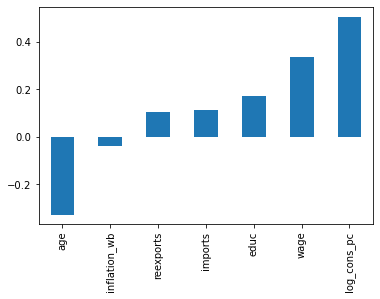

In [69]:
pd.Series(lasso_cv.coef_, features).sort_values(ascending = True).plot(kind = "bar")

## 3.4. Ridge Regression

In [70]:
#Ridge Cross validation 
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 15,20,20.8,21,22,30,40 ,50, 100]).fit(X_train, y_train)
#Score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.7402211585876038
The train score for ridge model is 0.6674167139060427


In [71]:
ridge_cv.alpha_

10.0

What are the relevant features found by the Lasso regression:

In [72]:
ridge_cv.coef_

array([ 0.32620917,  0.18047131, -0.04840044,  0.48142993,  0.07318964,
        0.1674071 , -0.33293467])

<AxesSubplot:>

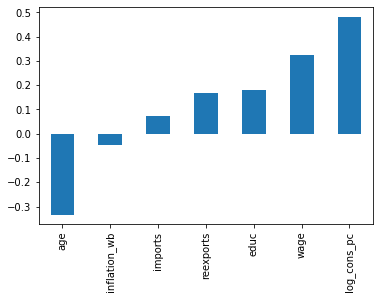

In [73]:
pd.Series(ridge_cv.coef_, features).sort_values(ascending = True).plot(kind = "bar")

We deduct from the analysis that `inflation`and `reexports` coefficients are converging to almost zero for both Regulaization methods and thus are not so relevant features in our model specification to explain the relationship. To reduce the possibility of overfitting we continue our Analysis without them in a "reduced" form.

***
### PanelOLS with reduced Specification

In [74]:
# Model
exog_red = sm.add_constant(stand_data[['age', 'log_cons_pc', 'imports', 'educ','wage']])
m_tcfe_red = PanelOLS(dependent=dependent,
             exog=exog_red,
             entity_effects=True,
             time_effects=True)
m_tcfe_red.fit(cov_type='clustered')

Dep. Variable:,y,R-squared:,0.1324
Estimator:,PanelOLS,R-squared (Between):,0.1024
No. Observations:,600,R-squared (Within):,-0.1049
Date:,"Fri, Jun 16 2023",R-squared (Overall):,0.0953
Time:,20:29:16,Log-likelihood,227.63
Cov. Estimator:,Clustered,,
,,F-statistic:,16.670
Entities:,30,P-value,0.0000
Avg Obs:,20.000,Distribution:,"F(5,546)"
Min Obs:,20.000,,
Max Obs:,20.000,F-statistic (robust):,12.568


The `log_cons_pc` coefficient of 0.054 is in line with our expectations of a positive relationship between Coffee consumption and productivity. It is marginally bigger then under the previous full specification. Imports coeffiecient is negative while for all other the coefficients are positive. 

***
# 4. Baysian regression

### 4.1. Baysian model 1: Reduced Model specification

First we set up our Model as specified in the Methods section. We choose a small uninformed prior (check term of guy in yt) to avoid overfitting. The Standardization and Transformation of the variables enables us to assume normally distributed coefficients. As the `\sigma` can only take positive values we choose a half-normal Distribution.

In [75]:
with pm.Model() as bay_model1:
    ##priors
    constant = pm.Normal('constant',mu = 0.0,sd = 1.0)
    σ_prior = 0.1
    
    b_consumption = pm.Normal('b_consumption', mu = 0, sd = σ_prior)
    b_age = pm.Normal('b_age', mu = 0, sd = σ_prior)
    b_imports = pm.Normal('b_imports', mu = 0, sd = σ_prior)
    b_educ = pm.Normal('b_educ', mu = 0, sd = σ_prior)
    b_wage = pm.Normal('b_wage', mu = 0, sd = σ_prior)
    
    ## missing varible draw from observed 
    Consumption= pm.Normal('Consumption',mu =0,sd =1.0 , observed = log_cons_pc)
    Age= pm.Normal('Age',mu =0,sd =1.0 , observed = age)
    Imports= pm.Normal('Inflation_wb',mu =0,sd =1.0 , observed = imports)
    Educ= pm.Normal('Educ',mu =0,sd =1.0 , observed = educ)
    Wage = pm.Normal('Wage',mu =0,sd =1.0 , observed =wage)
    
    # model
    μ = constant + b_consumption*Consumption + b_age*Age+ b_wage*Wage+b_imports*Imports+b_educ*Educ
    σ = pm.HalfNormal('σ', 1)
    
    productivity = pm.Normal('productivity', μ,σ, observed = prod_phw)
    trace_bay_model1 = pm.sample(draws=1000, cores = 4) # are choosen to reduce computational work needed, 
    
with bay_model1:
    ppc_bay_model1 = pm.sample_posterior_predictive(trace_bay_model1, var_names = ['productivity'])
    
posterior_data_bay_model1 = az.from_pymc3(
    trace_bay_model1, 
    posterior_predictive =ppc_bay_model1)    

/opt/conda/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Consumption contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/opt/conda/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Age contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/opt/conda/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Inflation_wb contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/opt/conda/lib/python3.9/site-packages/pymc3/model.py:1755: ImputationWarning: Data in Educ contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)
/opt/conda/lib/python3.9/site-packages/pymc3/model.py:

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 133 seconds.


/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


In [76]:
variables_ofinterest = ['b_consumption','b_age', 'b_imports', 'b_educ','b_wage' ]
az.summary(posterior_data_bay_model1.posterior, var_names = variables_ofinterest)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b_consumption,0.386,0.021,0.347,0.425,0.0,0.0,4127.0,3084.0,1.0
b_age,-0.345,0.019,-0.379,-0.308,0.0,0.0,5809.0,3092.0,1.0
b_imports,0.174,0.022,0.133,0.214,0.0,0.0,4673.0,2816.0,1.0
b_educ,0.144,0.020,0.103,0.180,0.0,0.0,5007.0,2874.0,1.0
b_wage,0.589,0.023,0.547,0.632,0.0,0.0,2234.0,2771.0,1.0


The fact that all r-hat values are 1.0 is giving us confidence in the soundness of the sampling process.

The mean valus of the distribution of coefficients on the left side.
* b_consumption lies around 0.38 
* b_age lies around -0.35
* b_imports lies around 0.17
* b_educ lies around 0.14
* b_wage lies around 0.59

The mean coefficient for consumption is to be interpreted the following: Given a one standard deviation increase in the coffee consumption we expect an increase of 0.38 standard deviations in labour productivity. Conflicting with widespread (miss)understanding of frequentist Confidence Intervals, Baysian techniques actually allow for the intuitive interpretation of these measures. With a 94% probability the true value of our coefficient lies with 0.348 and 0.422.

Main Takeaways from the output are that 
* `age` is showing a negative coefficient as expected 
* All other mean coefficients are positive
* Effects of `inflation` and `reexports` are not differing from zero can not be established 
* `wage` and Education are positively correlated as expected.


### 4.2. Trace plots

Furthermore, there are three criteria on the proper functioning of the conducted sampling process that need to be checked: 
* The trace plots shall be stationary (horizontal course)
* There is a random zig-zagging of the sampling process trace indicating good mixing
* The 4 different chains cover the same region for all coefficients
 

*Remark: Due to the fact that the `plot_trace` code could not be at the time of the final completion of this report not executed with out the kernel dying in jupyter the alternative approach was taken. I decided to visualize the trace plots to check for the first two criteria via `matplotlib`.Throughout the process of doing the analysis the plot was executed successfully and then the 4 chains covered the same regions for the coefficients. Hopefully on your machine it is working.*

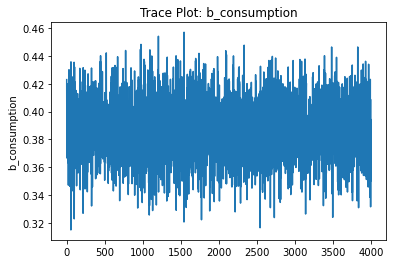

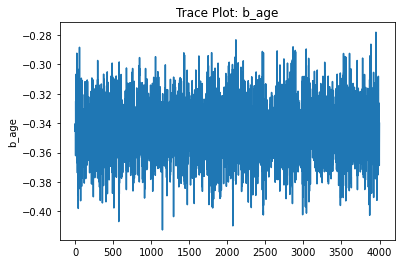

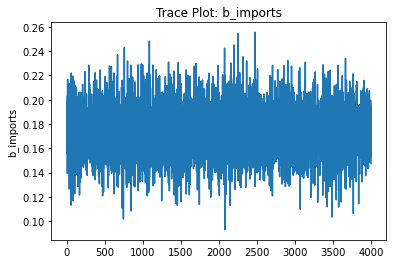

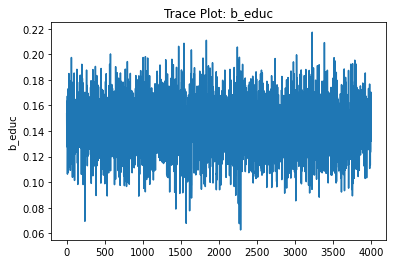

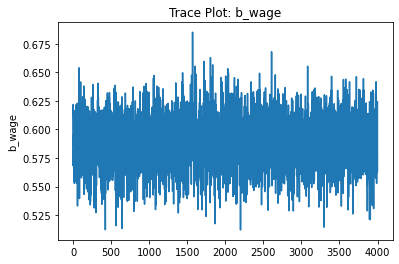

In [77]:
for variable in variables_ofinterest:
    plt.figure()  # Create a new figure for each plot
    plt.plot(trace_bay_model1[variable])
    plt.ylabel(variable)
    plt.title(f'Trace Plot: {variable}')

plt.show()

The plots are stationary and consensly zig-zagging. Hence the plots suggest that the first two criteria are satisfied and the sampling process was successfull executed. 

### 4.3. Model Fit

Next we are checking the fit of our Baysian Model. Therefore, we plot the observed values compared to the Confidence Intervals given of the Baysian Model. We check whether the realized values are within the bounds of the derived interval our  model is predicting. Do most observations fall within the 95% confidence Interval? We do the check exemplaric for consumption and wage because we had the most missings for.

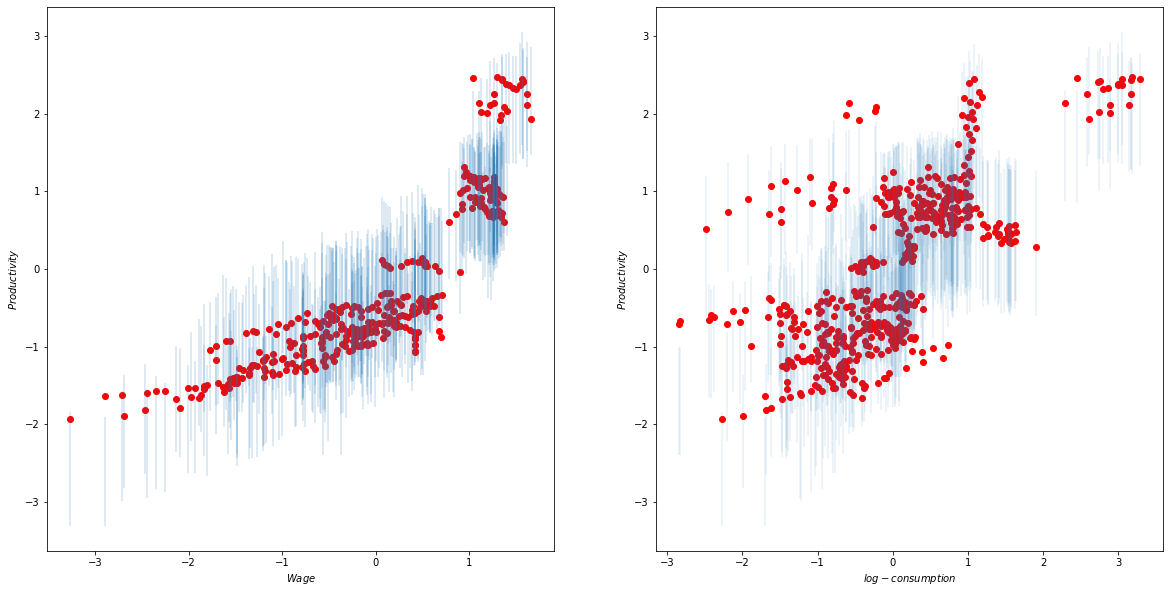

In [83]:
# collect the variables from before in a datafram
stand_data2 = pd.DataFrame({'log_cons_pc': log_cons_pc, 'y':prod_phw,'wage':wage})
# extract the 95 % intervals of the models posterior predictions
percentiles = np.percentile(ppc_bay_model1['productivity'],[2.5,97.5],axis=[0]).T
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 10))

ax1.vlines(stand_data2.wage,percentiles[:,0],percentiles[:,1],alpha=0.2)
ax1.scatter(stand_data2.wage,stand_data2.y, color='r')
ax1.set(xlabel='$Wage$', ylabel='$Productivity$');

ax2.vlines(stand_data2.log_cons_pc,percentiles[:,0],percentiles[:,1],alpha=0.1)
ax2.scatter(stand_data2.log_cons_pc,stand_data2.y, color='r')
ax2.set(xlabel='$log-consumption$', ylabel='$Productivity$');

From the Plots we can tell that almost all observations lie within the intervals predicted by the model. This strengthens our confidence in the model and the results derive from it. <Br>
*Remark: The values are derived from a model specification using 1000 draws and 4 cores as the kernel was constantly dying.*

# 5. Robustness analysis
To evaluate the robustness of our results we will run a differing OLS specification including only time fixed effects, do a brief analysis of the outliers and running the country & time FE OLS without the outliers. *Then we draw to the results found for the full specification of the Baysian model in Annex 1.*

### 5.1. OLS Model Specification: Only time fixed effects

In [ ]:
m_tfe = PanelOLS(dependent=dependent,
             exog=exog,
             entity_effects=False,
             time_effects=True)
m_tfe.fit(cov_type='clustered')

We notice vast diffrent in the coefficient of `log_cons_pc` depending on whether we analyse aggregated European Union data or allow for country-specific diffrences. Considering the models including country-fixed effects we only explain 18% $R^2$ of the overall variation in productivity by our independent variable consumption.

### 5.2. Dealing with Outliers

We identify outliers by using the common Inter Quartile Range metric. Therefor the 25 and 75 Percentile of each variable will be determined. The distance between both constitutes the IQR. As outliers we define all observations 1.5 times the IQR above the 75 percentile and 1.5 times below the 25% percentile.

In [ ]:
# Calculate the upper and lower limits
Q1 = stand_data['log_cons_pc'].quantile(0.25)
Q3 = stand_data['log_cons_pc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# identifies the rows containing outliers
outliers = stand_data.loc[(stand_data['log_cons_pc'] < lower) | (stand_data['log_cons_pc'] > upper)]
print(outliers)
print(stand_data['log_cons_pc'].skew()) # metric for the amount of skwedness in data, 0 is unskewed

Seems like we have some pretty extreme highs in coffee consumption per capita in Luxembourg and for single years in Finland. As we observe a only rightly skewed data we will only filter out these observations that lie above the upper limit.

In [ ]:
stand_data_out = stand_data.loc[stand_data['log_cons_pc'] < upper] 
print(stand_data['log_cons_pc'].skew())

Thus we get a lot closer to a symmetric distribution.

In [ ]:
fig, ax1 = plt.subplots()
sn.scatterplot(data=stand_data,x = 'year', y = 'log_cons_pc', hue = 'country', ax =ax1) 
ax1.legend().remove()
ax1.set_title('Consumption per capita - outlier excluded')
# Plot mean values as separate scatter points in ax1
mean_values = stand_data.groupby('year')['log_cons_pc'].mean()
ax1.scatter(mean_values.index, mean_values.values, s=100, color='red', marker='o', label='Mean')
plt.show()

In [ ]:
# Model
exog_red = sm.add_constant(stand_data_out[['age', 'log_cons_pc', 'imports', 'educ','wage']])
m_tcfe_red = PanelOLS(dependent=dependent,
             exog=exog_red,
             entity_effects=True,
             time_effects=True)
m_tcfe_red.fit(cov_type='clustered')tedError()

Imports coeffiecient is negative while for all other the coefficients are positive. But the coefficient for education is subject to considerable uncertainty.

#### 5.3. Drawing to Outcomes of Full Specifiction Baysian Regression

I also ran a full Specification containing all 7 variables. The results are qualitativly the same: A positive relation of consumption,imports, education and wage and a negative of age.
The coffee consumption effect laid in the same magnitude (0.35).
The inflation and reexport coefficient were small positive (0.025/0.068)  with its values ranging around zero(94% CI:  inflation from -0.008 to 0.06 ,reexports from -0.01 to 0.142).This somewhat confirmative also of the practice to exclude inflation and reexports from the PanelOLS regression.

# Discussion and conclusion

Comparing the results from the diffrent models conducted we can confirm a positive relationship between Coffee Consumption that we find in all specifications/types. While the country and year fixed OLS  finds only a small but positive overall effect, the OLS model for year fixed effects is delivering a relativly strong positive effect. The Baysian regression estimates an effect that lie within this numerical bounds and with 94% certainty between 0.34 and 0.42 standard deviations. Other then suspected, Coffee exports seemed to be a weak explanatory control as well as inflation rates in this case.

Our results should be considered and interpreted with extreme caution du to several weakpoints in our approach: <Br>
    
There is a high uncertainty around the exact direction of the proposed i.e. what variable is exerting influence on which. There is a case made for Reverse causality. Past and recent research e.g. by Grigg (2002) or Nguyen & Vo (2021) have pointed to a causal relationship of GDP/Income driving coffee consumption to rise. This is a severe downturn as it limits the extent to which we can make casual statements from the numbers found. To disentangle the effects one could turn to the use of an Instrumental Variable.
    
The two-way-fixed effects OLS approaches only explained a small part in the variation. Thus there might be other unobserved confounders out there that one would have to incorporate data on to get a clearer picture of the relationship. Two of those could be information on sleep quality and/or quantity and urbanisation of countries. The influence of sleep on both productivity and coffee consumption is straightforward.  Apart from few mainly private companies selling electronic sleep devices this data is very scarce on a cross-country-year format. But also urban areas are considered hubs for higher economic productivity but the the urban lanscape is characterised by coffee stores and a lifestyle in which coffee is omnipresent which is most likely fueling consumption. Data on Sleep is scarce
   
As mentioned in the beginning the missing values of wage are also problematic and especially the very basic approach undertaken by the author of this report to sample them from the entire sample population. More sophisticated imputation Methods would be necessary in a more extensive project framework. 
Lastly we turn the attention towards the drawback regarding the granularity of the data. The productivity data is based one unit level and the consumption data is aggregated over a whole country which limits the representitveness of our conclusion drawn from it regarding individual consumption patterns. More granular data on the coffee consumption would here be helpful.
    
To sum up we found references for an clear positive relationsship between productivity and coffee consumptions but the direction and the conclusions that can be drawn remain somewhat blurry to to the weakness to the approach taken. But to close with at least one message of absolute certainty: Coffee consumption strongly contributed to Productivity in the scope of the production process of this project.
***

#### Cited Literature

* Nguyen, H., & Vo, T. (2021). The role of the coffee industry in sustainable economic development in Vietnam. Accounting, 7(3), 683-690.
* Grigg, D. (2002). The worlds of tea and coffee: Patterns of consumption. GeoJournal, 283-294.
***

# Annex I: Lasso & Ridge - 2

As I did the Analysis of Lasso and Ridge with two approaches. In order to minimize calculation time I switched from the initial approach according to the approach implemented in the main body via `sklearn`. 

## Lasso Regression 2

Seems  like `imports`and `reexports`do not seem relevant model features as their coefficient is a lot closer to zero. This is somewhat dubious and not in line with the result found under the Regressions applying cross-validation.

## Ridge Regression2

# Annex II: Baysian Model - Full specification

### Baysian model 2 :  Full Specification

Then we sample from this posterior distribution generated in the model.

And summarize the results of the Posterior distribution and check the r-hat values.

#### Trace plots

As the command above using `plot_trace` lead for me to dying of the kernel, I decided to visualize the trace plots to check for the first two criteria via `matplotlib`.